# CNN on MNIST digits

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# data is shaped as (batch_size, rows, cols, channels)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)


x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN model
model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(3, 3),strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2),  strides=(2,2)))
model.add(Conv2D(filters=3, kernel_size=(3, 3),strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),  strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 3)         30        
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 3)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 3)         84        
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 3)          0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 75)                0         
                                                                 
 dense_14 (Dense)            (None, 128)             

Epoch 1/10
657/657 [==============================] - 6s 9ms/step - loss: 0.5842 - accuracy: 0.8272 - val_loss: 0.2539 - val_accuracy: 0.9228
Epoch 2/10
657/657 [==============================] - 5s 8ms/step - loss: 0.2142 - accuracy: 0.9342 - val_loss: 0.1763 - val_accuracy: 0.9472
Epoch 3/10
657/657 [==============================] - 6s 8ms/step - loss: 0.1528 - accuracy: 0.9530 - val_loss: 0.1468 - val_accuracy: 0.9555
Epoch 4/10
657/657 [==============================] - 5s 8ms/step - loss: 0.1213 - accuracy: 0.9625 - val_loss: 0.1302 - val_accuracy: 0.9602
Epoch 5/10
657/657 [==============================] - 5s 8ms/step - loss: 0.1039 - accuracy: 0.9667 - val_loss: 0.1167 - val_accuracy: 0.9640
Epoch 6/10
657/657 [==============================] - 5s 8ms/step - loss: 0.0909 - accuracy: 0.9717 - val_loss: 0.0978 - val_accuracy: 0.9709
Epoch 7/10
657/657 [==============================] - 5s 8ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.1008 - val_accuracy: 0.9696
Epoch 

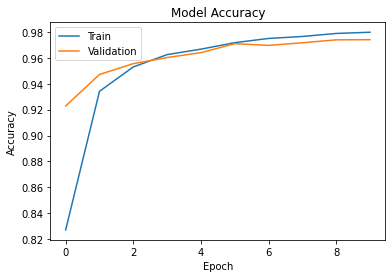

In [12]:
# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()